# Simple linear regression

Here we are given a real estate dataset. 

Real estate is a perfect example for a simple linear regression, as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression, using the data. 

Apart from that, we are going to:
-  Create a scatter plot (with a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: The dependent variable is 'price', while the independent variable is 'size'.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [7]:
data = pd.read_csv('real_estate_price_size.csv')

In [9]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Create the regression

### Declare the dependent and the independent variables

In [31]:
x = data['size']
y = data['price']

### Explore the data

In [33]:
x.shape

(100,)

In [35]:
y.shape

(100,)

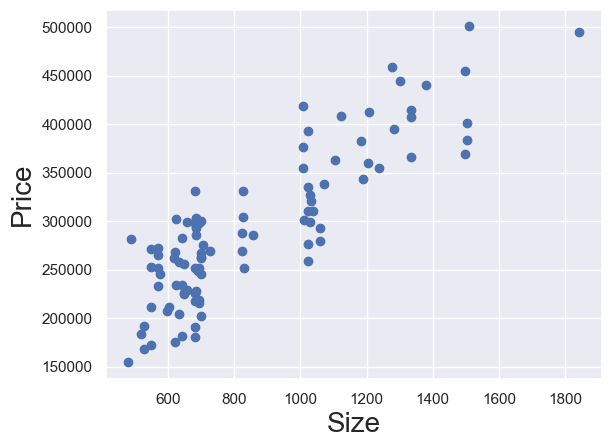

In [61]:
plt.scatter(x,y)
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

### Transform the inputs into a matrix (2D object)

In [37]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(100, 1)

### Regression itself

In [39]:
reg = LinearRegression()

In [41]:
reg.fit(x_matrix,y)

LinearRegression()

### Calculate the R-squared

In [43]:
reg.score(x_matrix,y)

0.7447391865847586

### Find the intercept

In [45]:
reg.intercept_

101912.60180122897

### Find the coefficients

In [47]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [51]:
reg.predict([[750]])

array([269296.65874718])

In [53]:
new_data = pd.DataFrame(data=[750,1500], columns=['size'])
new_data

,size
0,750
1,1500


In [55]:
reg.predict(new_data)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([269296.65874718, 436680.71569314])

In [57]:
new_data['Predicted_Price'] = reg.predict(new_data)
new_data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,size,Predicted_Price
0,750,269296.658747
1,1500,436680.715693


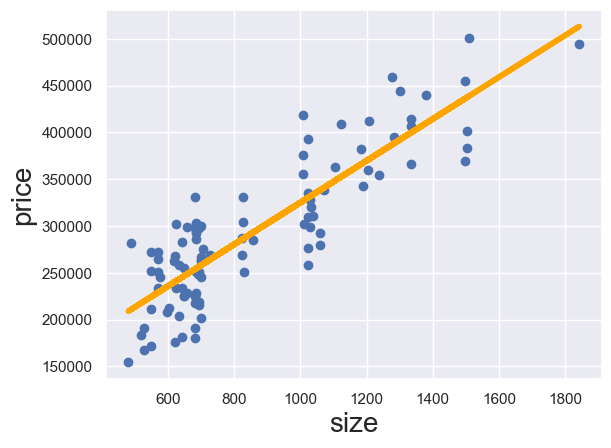

In [59]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()